# Introduction to Data Science

Authors: Jo Ciucă (ANU) 

In the first part of the Tutorial, we introduce the Python-based Data Science library Pandas and demonstrate some of its functionality by examining Pandas' main data structure, the DataFrame. In the first part (~45 mins/1 hr), we focus on the essentials of "data hacking" of loading, cleaning, exploring and visualising the data. For the second part, we employ what we learnt previously on a test case of exploratory data analysis. 

By the end of this notebook, we should be comfortable with the following:

1. **Primer of Pandas**: Data structures, Data I/O
2. **DataFrame Magic**: summary stats, sorting, iterating/selecting/changing rows and columns
3. **Advanced Pandas Techniques**: Filtering, Merging and joining, Grouping and Aggregating, Conditional Changes
5. **Data Visualisation with Pandas**: scatter plots, histograms, line plots, bar plots, more advanced techniques with Seaborn and/or Matplotlib
4. **Exploratory Data Analysis test case** 

With that in mind, let's get some pandas. 

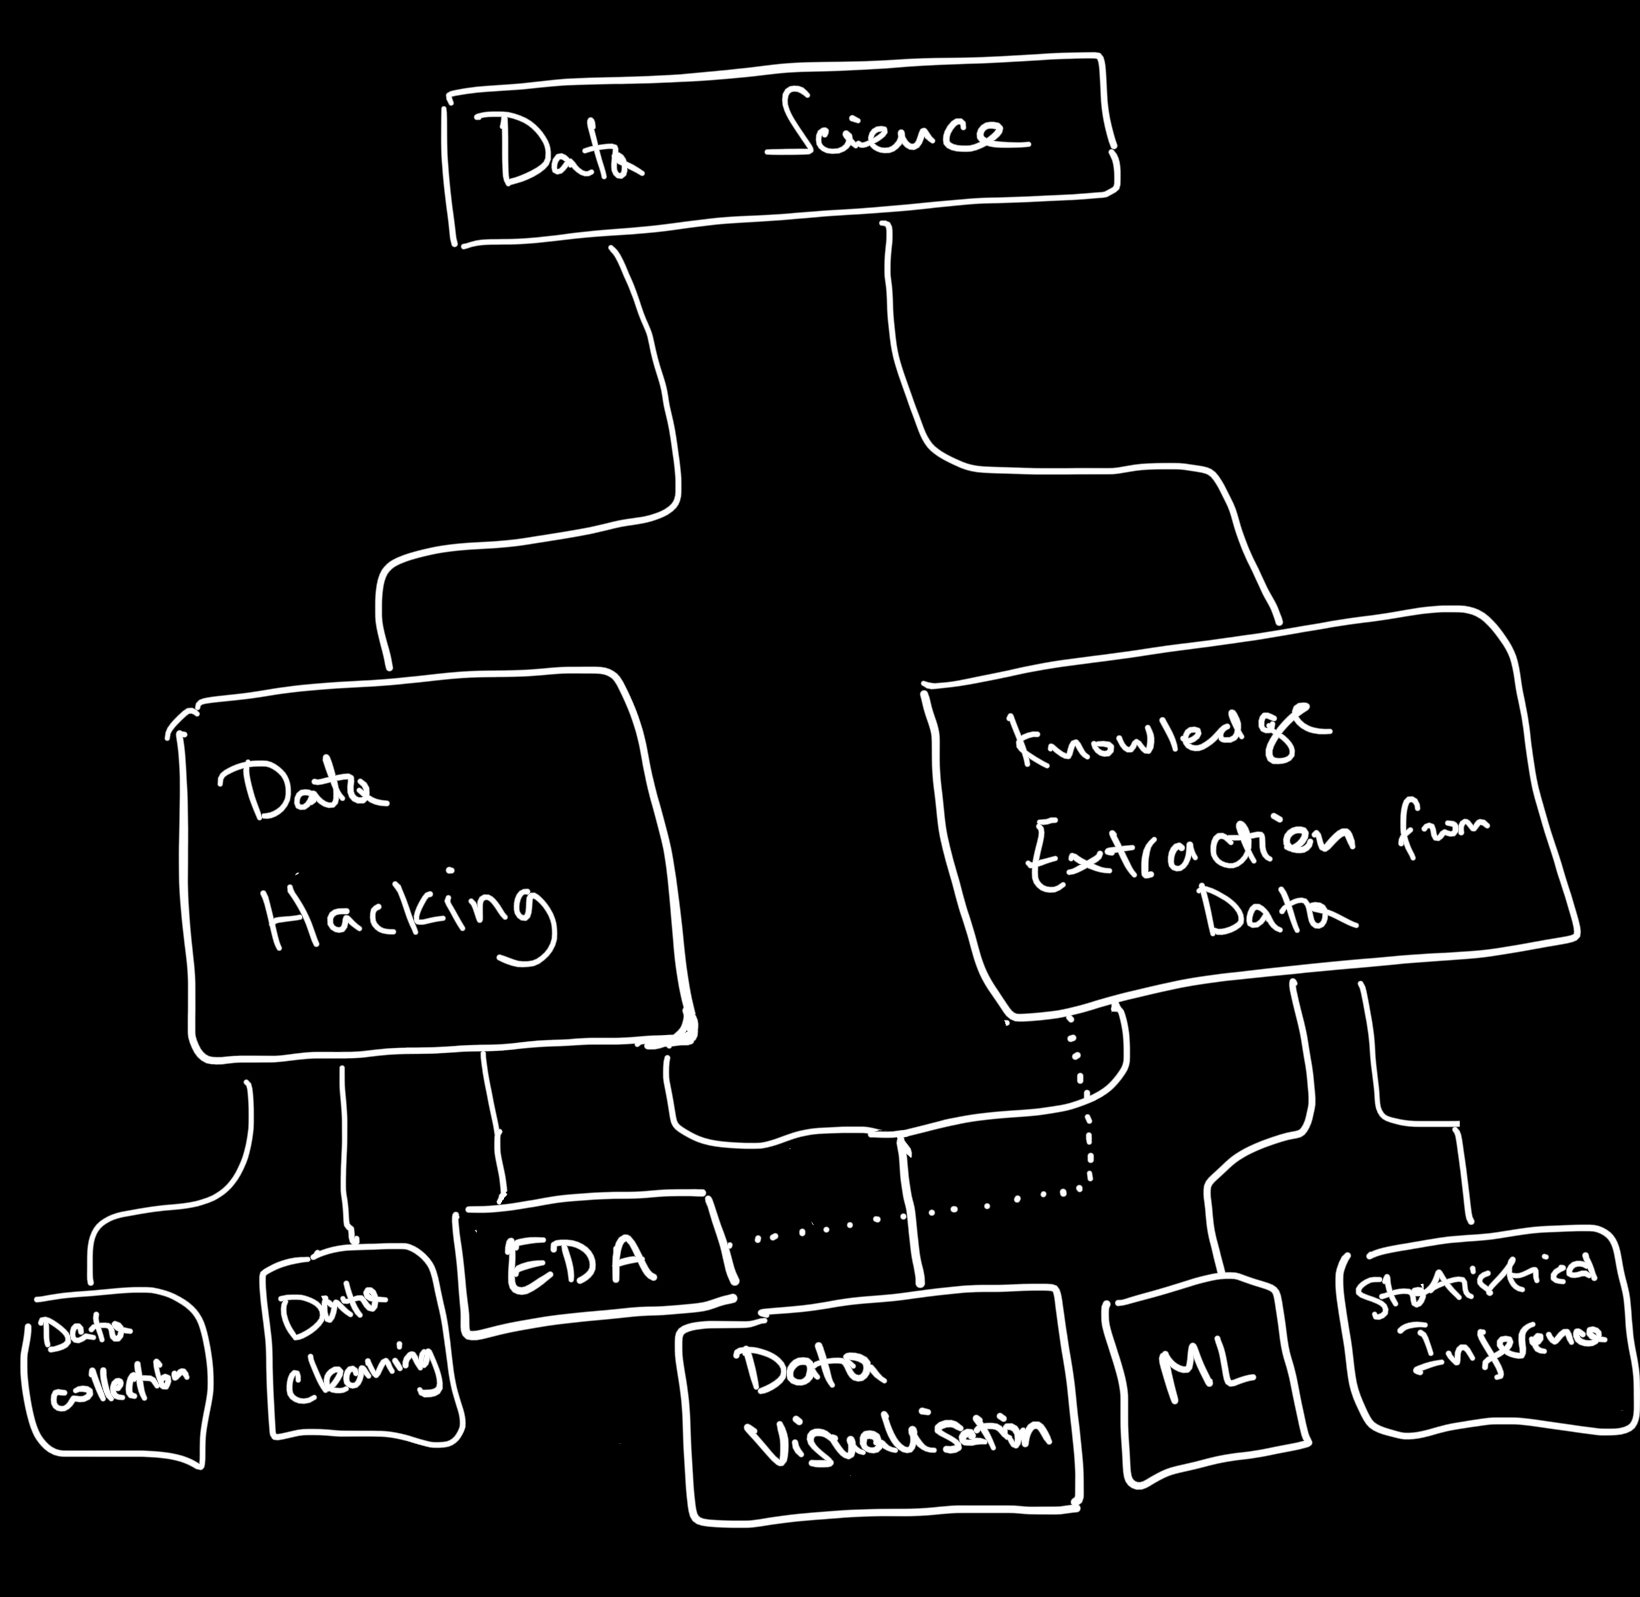

In [47]:
from IPython.display import Image
Image('images/ds_insights.jpeg', width=600)

## Primer of Pandas:
* Pandas Building Blocks: The Series, DataFrame and Index 
* Creating and saving a DataFrame
* Loading, reading a data file into a DataFrame. 
* Wrangling a nasty file

In [2]:
# create a pandas series from a list
import pandas as pd
import numpy as np

s = pd.Series([1,3,5,7,9])

# create a pandas series from a dictionary
d = {'a': 1, 'b': 3, 'c': 5, 'd': 7, 'e': 9}
s = pd.Series(d)

#create a pandas series from a numpy array
import numpy as np
a = np.array([1,3,5,7,9])
s = pd.Series(a)

s

0    1
1    3
2    5
3    7
4    9
dtype: int64

In [21]:

# extracting a value from the series

# extract the value at index 0
s[0]
s.iloc[0]
s[0] == s.iloc[0] #integer location

#how about when we have strings as the index? We can use a label based location by calling s.loc[label] instead of s[label]
s = pd.Series([1,3,5,7,9], index=['a','b','c','d','e'])
s.index.name = 'ID'
s.name = 'Cats'

print(s)

print(s.iloc[1])

3

In [23]:
s.loc['b'] #label based location
s['b']

3

In [44]:
# let's create a pandas dataframe from a dictionary consisting of how many cats and dogs a given household has
d = {'cats': [1,3,5,7,9], 'dogs': [2,4,6,8,10]}
df = pd.DataFrame(d)

# another way to create a dataframe

cats = pd.Series([1,3,5,7,9], name='cats')
dogs = pd.Series([2,4,6,8,10], name='dogs')
df = pd.concat([cats, dogs], axis=1)

print(df)

birds = pd.Series([1,3,5,7,9], name='birds')
#add birds to df
new_df = pd.concat([df, birds], axis=1)
print(new_df)

# Q: What happens if birds has suddenly become a pandas series with 6 elements instead of 5? How will the new_df look like?

#map the index column to a different column corresponding to some family names
new_df.index = ['Ting', 'Khan', 'Chen', 'Ciuca', 'Williams']
print(new_df)

new_df.index.name = 'Name'
print(new_df)

print(new_df.loc['Chen']) # label based location
print(new_df.iloc[2]) # we will soon learn how to select rows based on a condition

# now that we created this dataframe, let's save it somewhere
new_df.to_csv('cats_dogs_birds.csv')



cats     5
dogs     6
birds    5
Name: Chen, dtype: int64

In [ ]:
# read data from a csv file



In [ ]:
# save the dataframe to a csv file


So far, we focused on creating our very own dataframe from scratch. Often times, we already have a dataset that we would like to explore. We now turn our attention to loading this special datafile and reading it properly.

## DataFrame Magic

Now that we have access to a DataFrame either by creating or reading an already existing data file, we can explore and change it in several meaningful ways:
* High-level characteristics of the DataFrame
* Sorting the df based on a row or column
* Selecting a row or column
* Changing the contents of a row or colum
* Adding & deleting a row or column

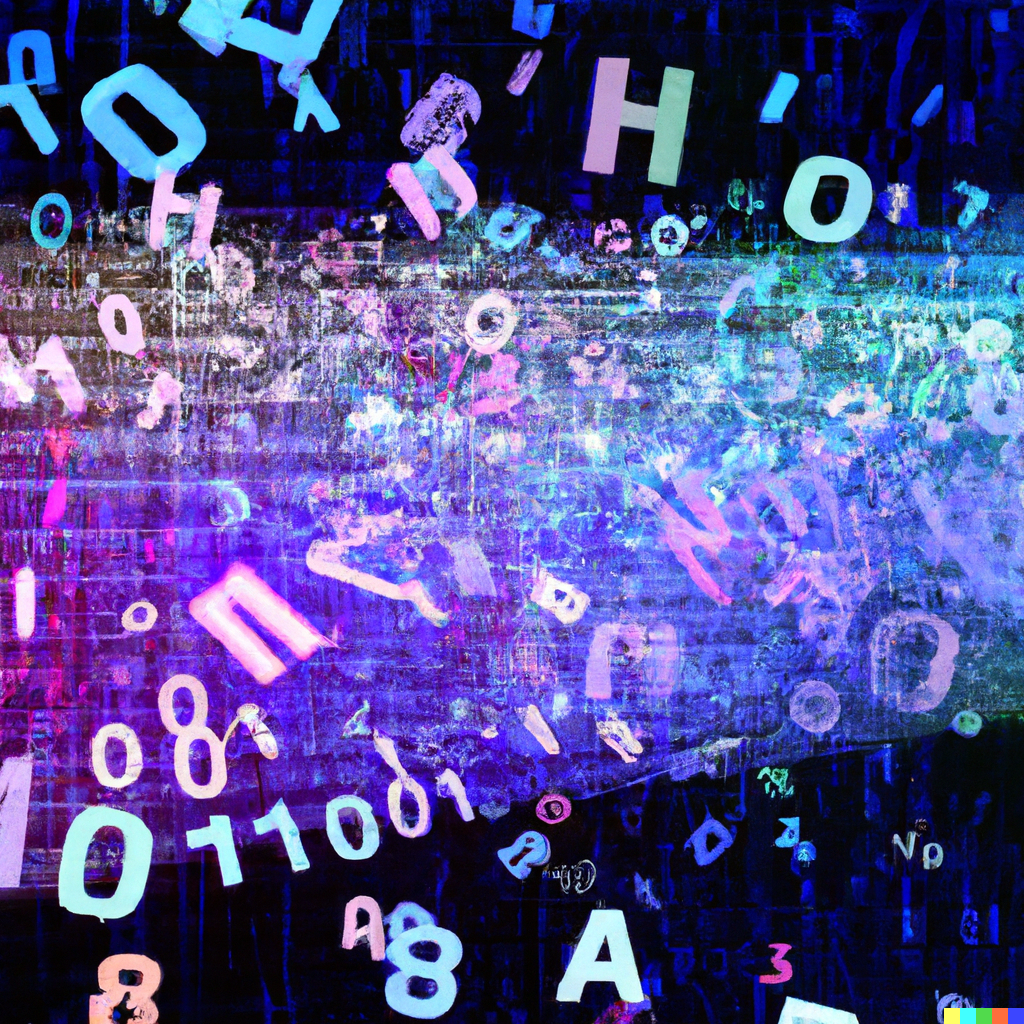

In [51]:
Image('images/dataframe_magic.png', width=400)

In [16]:
#let's load the netflix dataset taken from Kaggle https://www.kaggle.com/datasets/shivamb/netflix-shows
df_netflix = pd.read_csv('data/netflix_titles.csv')
df_netflix.head()

# let's see how many rows and columns we have
df_netflix.shape

(8807, 12)

In [18]:
# let's see the column names
df_netflix.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [19]:
# let's see the data types of each column
df_netflix.dtypes


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [20]:
df_netflix.info() #putting it all together

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [21]:
df_netflix.describe() #Q: why did we only get one column?

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000
